# Cuadrados mínimos lineal paso a paso

In [1]:
import math
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from scipy.stats import chi2

In [2]:
import danatools

## Datos

In [3]:
input_file = "cuadrados_minimos_lineal.csv"
data = pd.read_csv(input_file, index_col='i')
print(data)

      x      y     dy
i                    
1 -0.18  2.243  0.008
2 -0.14  2.217  0.008
3 -0.10  2.201  0.010
4 -0.06  2.175  0.009
5 -0.02  2.132  0.011
6  0.02  2.116  0.016
7  0.06  2.083  0.018
8  0.10  2.016  0.021
9  0.14  2.004  0.017


<ErrorbarContainer object of 3 artists>

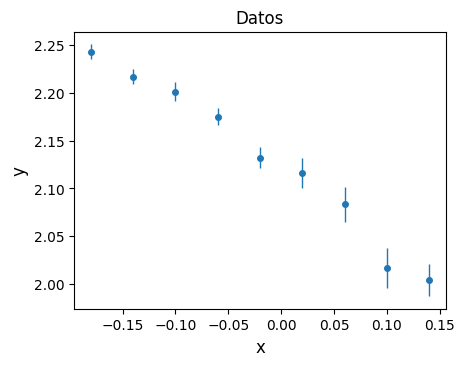

In [4]:
fig, ax = plt.subplots()
plt.title("Datos")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.errorbar(data['x'], data['y'], data['dy'],ls='none', marker='o', label="Datos")
# fig.savefig('linear_least_squares_data.svg')

## Estimador de máxima verosimilitud

In [5]:
V = np.diag(data['dy']**2)
V

array([[6.40e-05, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 6.40e-05, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 1.00e-04, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 8.10e-05, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.21e-04, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.56e-04,
        0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        3.24e-04, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 4.41e-04, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 2.89e-04]])

The fit model is par[0] + par[1] * x

In [6]:
A = np.column_stack([data['x']**0, data['x']])
A

array([[ 1.  , -0.18],
       [ 1.  , -0.14],
       [ 1.  , -0.1 ],
       [ 1.  , -0.06],
       [ 1.  , -0.02],
       [ 1.  ,  0.02],
       [ 1.  ,  0.06],
       [ 1.  ,  0.1 ],
       [ 1.  ,  0.14]])

In [7]:
cova = inv( A.T @ inv(V) @ A )
cova

array([[2.40988624e-05, 1.34418437e-04],
       [1.34418437e-04, 1.69012059e-03]])

In [8]:
B = cova @ A.T @ inv(V)
B

array([[-1.50712868e-03,  8.25043943e-02,  1.06570187e-01,
         1.97947607e-01,  1.76946228e-01,  1.04637622e-01,
         9.92715080e-02,  8.51263176e-02,  1.48503265e-01],
       [-2.65317609e+00, -1.59685072e+00, -3.45936225e-01,
         4.07545693e-01,  8.31537396e-01,  6.57112690e-01,
         7.27857013e-01,  6.88051011e-01,  1.28385924e+00]])

In [9]:
par_est = B @ data['y']
y0_est = par_est[0]
m_est = par_est[1]
par_est

array([ 2.1192891 , -0.72690669])

## Plot del ajuste

In [10]:
xfit = np.linspace( data['x'].min(), data['x'].max())
Afit = np.column_stack([xfit**0, xfit])
mu_est = Afit @ par_est

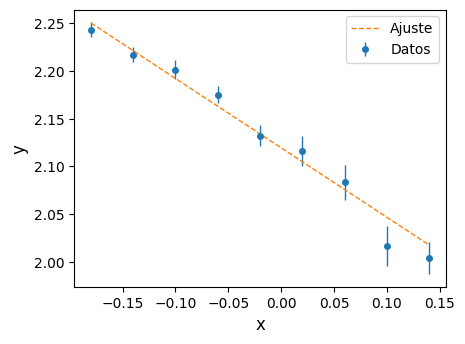

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.errorbar(data['x'], data['y'], data['dy'],ls='none', marker='o', label="Datos")
ax.plot(xfit, mu_est, ls='--', label="Ajuste")
ax.legend()

## Errores de los parámetros

In [12]:
dy0 = math.sqrt(cova[0][0])
dm = math.sqrt(cova[1][1])
rho = cova[0][1] / (dy0 *dm)

In [13]:
print(f'Ordenada al origen:  {y0_est:2.2f} ± {dy0:2.2f}')
print(f'Pendiente ajustada: {m_est:2.2f} ± {dm:2.2f}')
print(f'Correlación: {rho:2.2f}')

Ordenada al origen:  2.12 ± 0.00
Pendiente ajustada: -0.73 ± 0.04
Correlación: 0.67


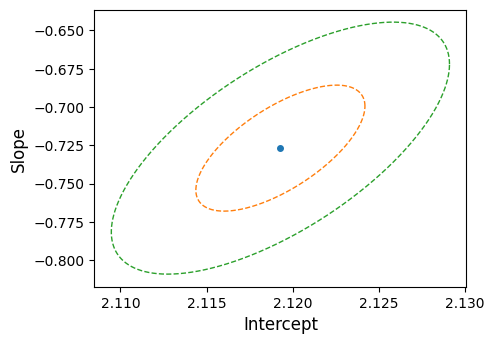

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel("Intercept")
ax.set_ylabel("Slope")
ax.plot(*par_est, 'o')
elipse_1sigma = danatools.get_ellipse(par_est, cova, nsigma=1)
ax.plot(*elipse_1sigma, ls='--')
elipse_2sigma = danatools.get_ellipse(par_est, cova, nsigma=2)
ax.plot(*elipse_2sigma, ls='--')

## Bondad del ajuste

In [15]:
residuos = data['y'] - A@par_est
J_min_observado = residuos.T @ inv(V) @ residuos
J_min_observado

7.1152775288882255

In [16]:
ndatos = len(data['x'])
grados_libertad = ndatos - 2
grados_libertad

7

In [17]:
pvalor = chi2.sf(J_min_observado, grados_libertad)
print(f"pvalor = {pvalor*100:.2f}%")

pvalor = 41.70%


## Banda de error

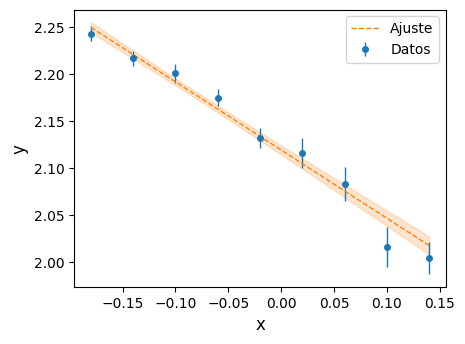

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.errorbar(data['x'], data['y'], data['dy'],ls='none', marker='o', label="Datos")
ax.plot(xfit, mu_est, ls='--', label="Ajuste")
var_mu_est = cova[0][0] + xfit**2*cova[1][1] + 2*xfit*cova[0][1]
sigma_mu_est = np.sqrt(var_mu_est)
ax.fill_between(xfit, mu_est-sigma_mu_est, mu_est+sigma_mu_est, color='tab:orange', alpha=0.2)
ax.legend()
# fig.savefig('linear_least_squares_fit.svg')